# Task 3: To explore unsupervised learning (scikit-learn)

### Name: Gaurav Pore

### Task: To predict optimum number of clusters and represent it visually

In [3]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


### Data Preprocessing

In [4]:
#loading dataset
data = pd.read_csv("Iris.csv")
data.head(100)
y= data.target


AttributeError: 'DataFrame' object has no attribute 'target'

In [30]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
# column names
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data visualization

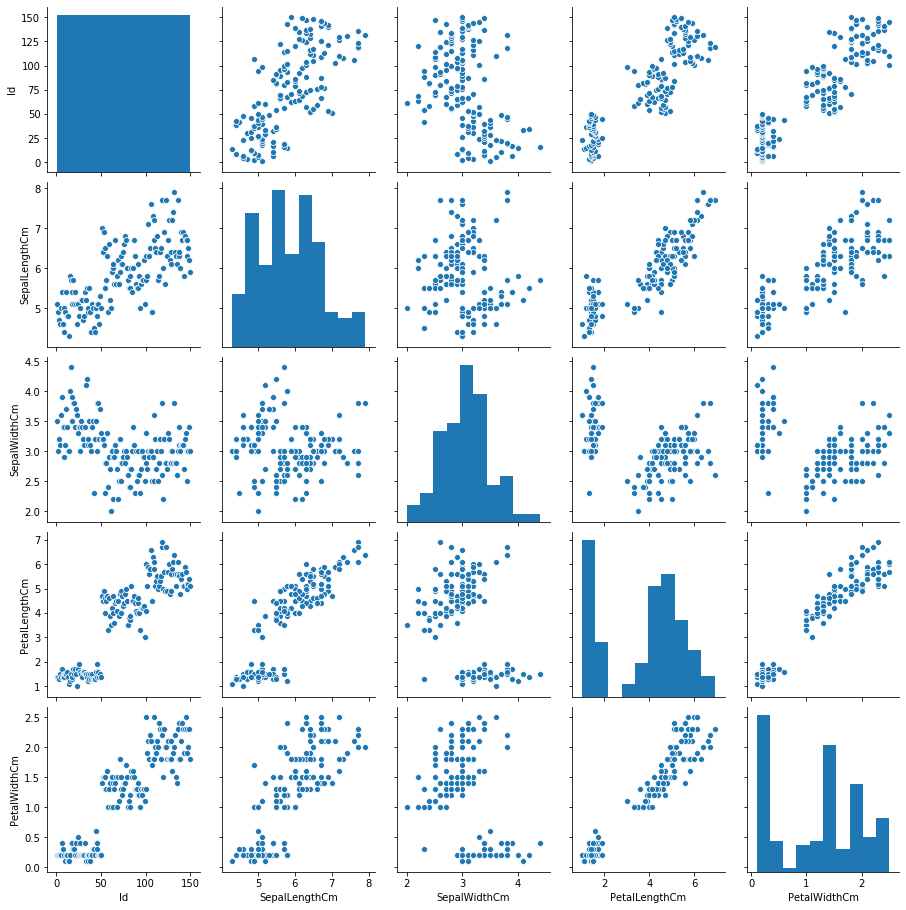

In [34]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E41638C488>,
      dtype=object)

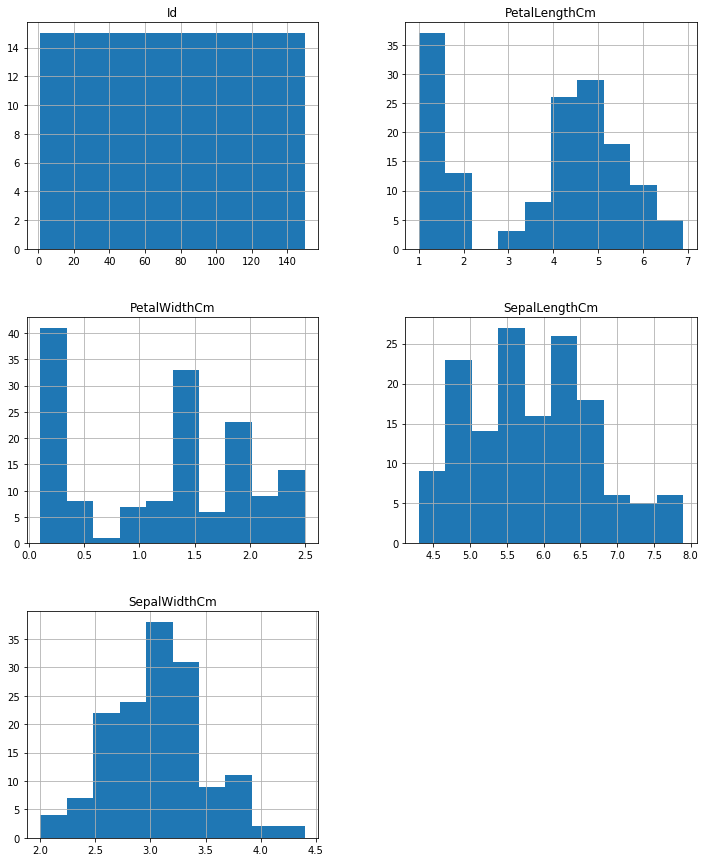

In [35]:
data.hist(figsize = (12,15))

### Finding optimum number of clusters

No handles with labels found to put in legend.


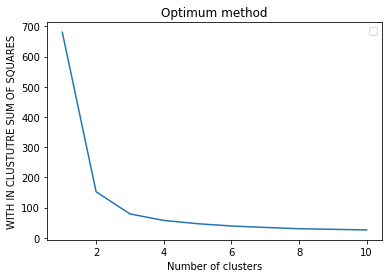

In [50]:
data0 =data.iloc[:, [1, 2, 3,4]].values

from sklearn.cluster import KMeans
iner = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data0)
    iner.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), iner)
plt.title('Optimum method')
plt.xlabel('Number of clusters')
plt.ylabel('WITH IN CLUSTUTRE SUM OF SQUARES') # Within cluster sum of squares
plt.legend()
plt.show()

In [51]:
data1 = data.iloc[:,1:4].values
k = KMeans(n_clusters = 3)
km = k.fit(data1)
predict = km.predict(data1)

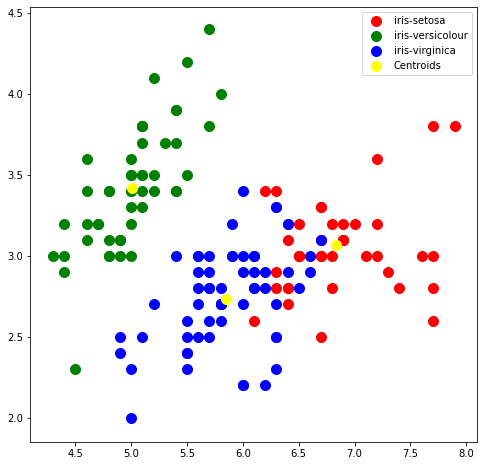

In [47]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (8,8))
plt.scatter(data1[predict == 0,0],data1[predict == 0,1],s = 100,c = 'red',label = 'iris-setosa')
plt.scatter(data1[predict == 1,0],data1[predict == 1,1],s = 100,c = 'green',label = 'iris-versicolour')
plt.scatter(data1[predict == 2,0],data1[predict == 2,1],s = 100,c = 'blue',label = 'iris-virginica')

# Plotting the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = 'upper right')
plt.show()